In [1]:
import numpy as np

import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input
from keras.utils import to_categorical

In [2]:
def plot_advanced_history(history):
    fig, axs = plt.subplots(2)

    # Plot training & validation loss values
    axs[0].plot(history.history['loss'], label='Training Loss')
    axs[0].plot(history.history['val_loss'], label='Validation Loss')
    axs[0].set_title('Model Loss')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].legend()

    # Plot training & validation accuracy values
    axs[1].plot(history.history['accuracy'], label='Training Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[1].set_title('Model Accuracy')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [3]:
# Импортиртируем набор данных (для обучения и тестовый) MNIST из модуля Keras
# (картинки 28х28 пик. и цифры которые соответствуют картинкам)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Нормализуем данные (все данные в массиве, делим на 255)
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# Преобразовывает вектор класса (целые числа) в двоичную матрицу класса
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Задаем входной формат данных для модели
input_shape = (28, 28, 1)

In [7]:
# Создаем модель Keras - последовательная модель Sequential
model_1 = Sequential([
    Input(shape=input_shape),         # устанавливаем входной формат данных
    Flatten(),                        # сглаживание
    Dense(50, activation = 'relu'),   # Слой нейронной сети из 50 нейронов и функцией активации 'relu'
    Dense(10, activation = 'softmax') # Слой нейронной сети из 10 нейронов и функцией активации 'softmax'
    ])

# Компилируем модель
model_1.compile(optimizer='Adam',                 # выбираем оптимизатор
                loss='categorical_crossentropy',  # выбираем функцию потерь
                metrics=['accuracy'])             # выбираем метрику

# Обучение и сохранение истории обучения с одновременной оценкой на тестовых данных
history_1 = model_1.fit(x_train, y_train, batch_size=32, epochs=5, validation_data =(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 2s 953us/step - loss: 0.3117 - accuracy: 0.9117 - val_loss: 0.1817 - val_accuracy: 0.9477
Epoch 2/5
1875/1875 [==============================] - 2s 866us/step - loss: 0.1565 - accuracy: 0.9549 - val_loss: 0.1331 - val_accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.1154 - accuracy: 0.9656 - val_loss: 0.1176 - val_accuracy: 0.9660
Epoch 4/5
1875/1875 [==============================] - 2s 845us/step - loss: 0.0922 - accuracy: 0.9719 - val_loss: 0.1038 - val_accuracy: 0.9661
Epoch 5/5
1875/1875 [==============================] - 2s 839us/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.0932 - val_accuracy: 0.9713


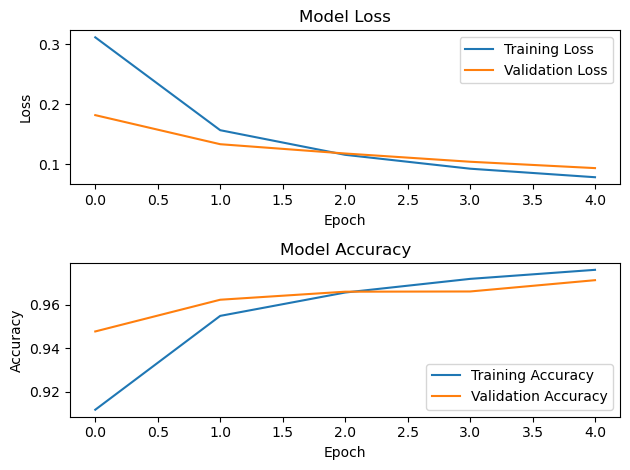

In [8]:
plot_advanced_history(history_1)

Увеличим количество нейронов внутреннего слоя, batch_size и количество эпох.

In [9]:
# Создаем модель Keras - последовательная модель Sequential
model_2 = Sequential([
    Input(shape=input_shape),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])

# Компилируем модель
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Обучение и сохранение истории обучения с одновременной оценкой на тестовых данных
history_2 = model_2.fit(x_train, y_train, batch_size=128, epochs=10, validation_data =(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2716 - accuracy: 0.9232 - val_loss: 0.1507 - val_accuracy: 0.9559
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1098 - accuracy: 0.9679 - val_loss: 0.1005 - val_accuracy: 0.9668
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0705 - accuracy: 0.9794 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0506 - accuracy: 0.9852 - val_loss: 0.0787 - val_accuracy: 0.9767
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0367 - accuracy: 0.9896 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0633 - val_accuracy: 0.9801
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0197 - accuracy: 0.9949 - val_loss: 0.0687 - val_accuracy: 0.9793
Epoch 

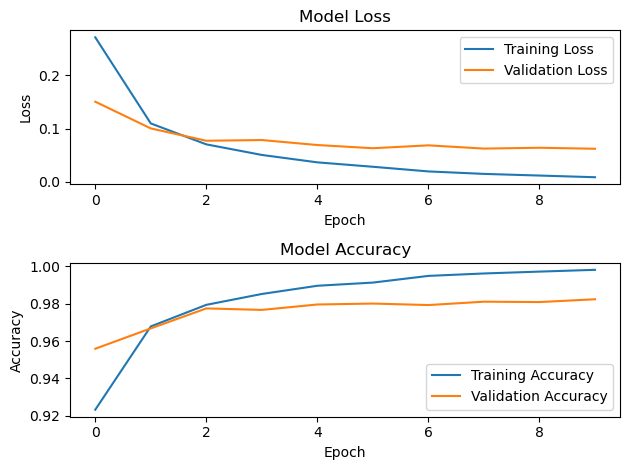

In [10]:
plot_advanced_history(history_2)

In [11]:
history_1.history['val_accuracy'][-1], history_2.history['val_accuracy'][-1]

(0.9713000059127808, 0.9824000000953674)

Внесенные изменения позволили немного улучшить точность модели.

### Распознование своих рукописных цифр

In [12]:
from PIL import Image

def digit(img_path, model):
    img = Image.open(img_path).convert('L') 
    img_array = np.array(img)
    
    plt.figure(figsize=(2, 2))
    plt.imshow(img_array, cmap='gray')
    plt.show()
    
    img_array = img_array.reshape(1, 28, 28)
    img_array = img_array / 255
    prediction = model.predict(img_array)
    digit = np.argmax(prediction)
    
    return digit

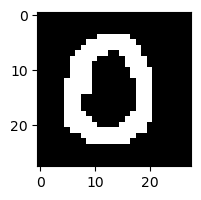

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 0


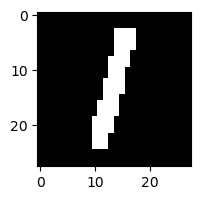

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 1


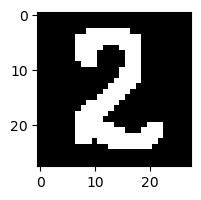

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 2


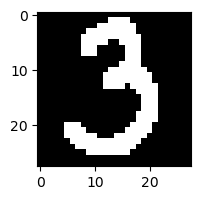

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 3


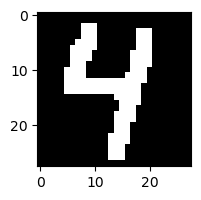

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 4


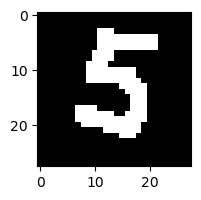

1/1 [==============================] - 0s 15ms/step
ЦИФРА: 5


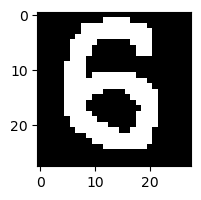

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 6


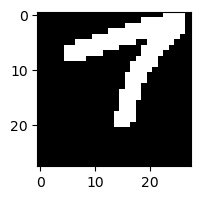

1/1 [==============================] - 0s 15ms/step
ЦИФРА: 7


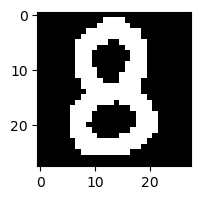

1/1 [==============================] - 0s 13ms/step
ЦИФРА: 8


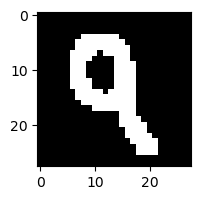

1/1 [==============================] - 0s 14ms/step
ЦИФРА: 9


In [14]:
for i in range(10):
    img_file = f"./img/0{i}.png"
    print("ЦИФРА:", digit(img_file, model_2))